In [94]:
# Basic operations
import numpy as np
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from time import time

# Data visualization
import matplotlib.pyplot as plt


# Apriori market bucket analysis
from mlxtend.frequent_patterns import apriori

In [95]:
# Import data
data = pd.read_csv('./marketData.csv', header = None)

# Visualize the data size
data.shape

(7501, 20)

In [96]:
# Visualize the head section
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
# Visualize the tail section
data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7500,eggs,frozen smoothie,yogurt cake,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
# making each customers shopping items an identical list
trans = []
for i in range(0, 7501):
    tmp = []
    for j in range(0, 20):
        if str(data.values[i,j]) != 'nan':
            tmp.append(str(data.values[i,j]))
            
    if len(tmp) > 0 : 
        trans.append(tmp)

In [99]:
#encoded used to each of the data
te = TransactionEncoder()
df = te.fit_transform(trans)
df = pd.DataFrame(df, columns = te.columns_)

# getting the shape of the data
df.shape

(7501, 120)

In [100]:
df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [103]:
# apriori splits 1%, 10%, 30%, 50%, 75%, 90%, 100%
aprioriSplits = [df[:int(len(df) / 100)] ,df[:int(len(df) / 10)], df[:int(len(df) * 3 / 10)] ,df[:int(len(df) / 2)] ,df[:int(len(df) * 3/ 4)], df[:int(len(df) * 9/ 10)], df[:int(len(df))]]

# min suports
minSupportRange = [0.05, 0.04, 0.03, 0.06]

aprioriTime = []
for split in aprioriSplits:
    startTime = time()
    for i in range(0, 100):
        apriori(split, min_support = 0.05)
    endTime = time() 
    aprioriTime.append((endTime - startTime)/len(minSupportRange))

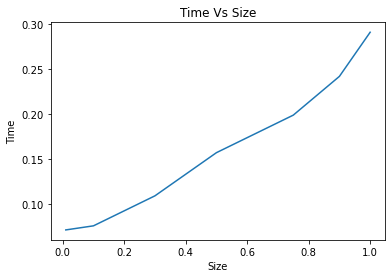

In [104]:
# common X axis
size = [0.01, 0.1, 0.3, 0.5, 0.75, 0.9, 1]

# Plot the graph for Apriori
plt.plot(size, aprioriTime)
plt.title('Time Vs Size')
plt.xlabel('Size')
plt.ylabel('Time')
plt.show()

In [105]:
# Brute force approach 
firstLength = len(aprioriSplits[0])
constant = aprioriTime[0]/( firstLength * firstLength + firstLength)

In [106]:
# Time for each data set
bruteForceTime = [aprioriTime[0]]
for i in range (1, len(aprioriSplits)):
    length = len(aprioriSplits[i])
    bruteForceTime.append(constant * (length * length + length))

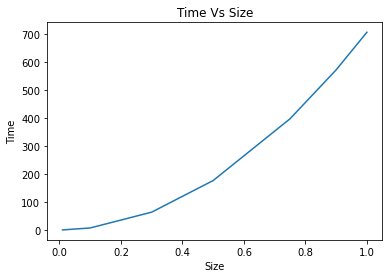

In [107]:
# Plot the graph for Brute force
plt.plot(size, bruteForceTime)
plt.title('Time Vs Size')
plt.xlabel('Size')
plt.ylabel('Time')
plt.show()

In [108]:
index = []
for i in aprioriSplits:
    index.append(len(i))

my_df = pd.DataFrame({
    'Brute Force': bruteForceTime,
    'Apriori': aprioriTime,

},index=index)

df_reset=my_df.reset_index()

print(my_df,"\n")

      Brute Force   Apriori
75       0.071530  0.071530
750      7.068292  0.076056
2250    63.558156  0.109362
3750   176.519060  0.157268
5625   397.132591  0.198932
6750   571.853990  0.241934
7501   706.170385  0.290914 

